In [108]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import logistic
import h5py # common package to interact with a dataset that is stored on an H5 file.
import os
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
%matplotlib notebook

In [109]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
# scaling data
scaler_breast_cancer = StandardScaler()
X_train_scaled = scaler_breast_cancer.fit_transform(X_train)
X_test_scaled = scaler_breast_cancer.transform(X_test)

In [112]:
 # YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
clf = MLPClassifier(
    solver='lbfgs',
    random_state=0,
    max_iter=1000,
    hidden_layer_sizes=(100, 100)
).fit(X_train, y_train)
print("train accuracy = {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy = {:.3%}".format(clf.score(X_test, y_test)))
# END_CODE 

train accuracy = 96.484%
test accuracy = 94.737%


# Sighns Dataset

In [113]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [114]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [115]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

<IPython.core.display.Javascript object>


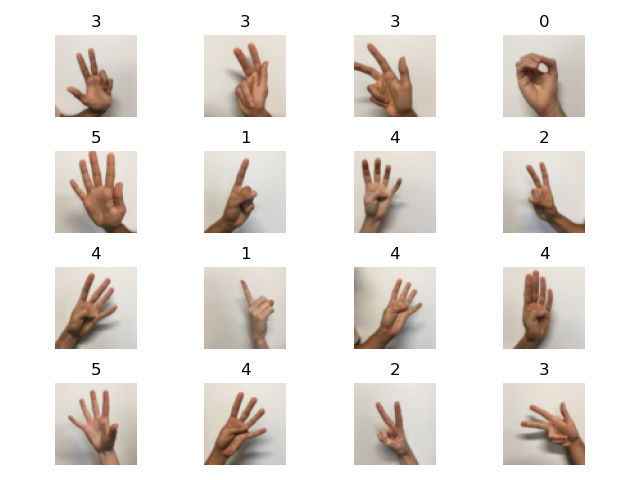

In [116]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [117]:
plt.gcf().canvas.set_window_title('Train set')

In [118]:
# YOUR_CODE.  Preproces data
# START_CODE
# scaling data
scaler_sighn_data = StandardScaler()
X_train_scaled = scaler_sighn_data.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler_sighn_data.transform(X_test.reshape(X_test.shape[0], -1))
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))
print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


In [119]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
clf = MLPClassifier(
    solver='lbfgs',
    random_state=0,
    max_iter=1000,
    hidden_layer_sizes=(150)
).fit(X_train_scaled, y_train)

print("train accuracy =  {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy = {:.3%}".format(clf.score(X_test_scaled, y_test)))


# END_CODE 

train accuracy =  100.000%
test accuracy = 95.000%


<IPython.core.display.Javascript object>


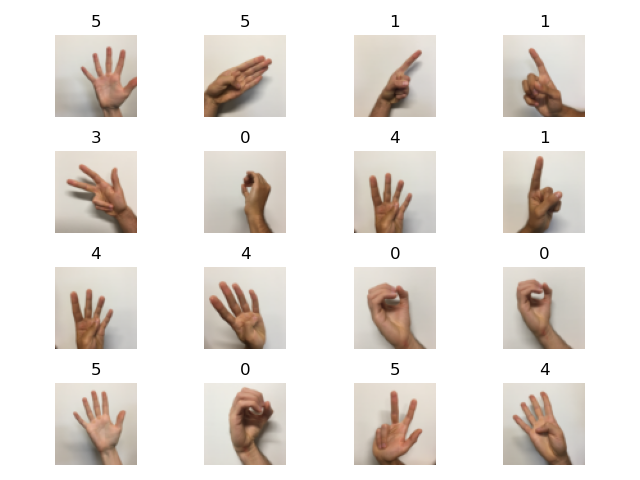

In [120]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)

In [121]:
plt.gcf().canvas.set_window_title('Test set prediction')

# Compare with SVM

In [122]:
from sklearn.svm import SVC

In [123]:
clf = SVC(C=2, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 65.000%
